In [35]:
import pandas as pd
df = pd.read_csv(r"D:\downloads\CarPrice_Assignment.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())



Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:
df.drop(columns=['car_ID','CarName'], inplace=True)

In [40]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", 
                    "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", 
            "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df[num_cols] = scaler.fit_transform(df[num_cols])


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", 
            "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df[num_cols] = scaler.fit_transform(df[num_cols])


In [43]:
#LINEAR REGRESSOR



from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}\n")


Linear Regression:
R² Score: 0.5758
MSE: 0.5559
MAE: 0.5332



In [44]:
#DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"R² Score: {r2_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"MAE: {mae_dt:.4f}\n")


Decision Tree Regressor:
R² Score: 0.6221
MSE: 0.4952
MAE: 0.4547



In [45]:
#RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}\n")


Random Forest Regressor:
R² Score: 0.8051
MSE: 0.2554
MAE: 0.3275



In [46]:
#GRADIENT BOOST REGRESSOR

from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print(f"R² Score: {r2_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}\n")


Gradient Boosting Regressor:
R² Score: 0.7756
MSE: 0.2940
MAE: 0.3716



In [47]:
#SVM Regressor

from sklearn.svm import SVR



# Train Support Vector Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)  # Use scaled data for SVR

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print(f"R² Score: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}\n")


Support Vector Regressor:
R² Score: 0.7276
MSE: 0.3570
MAE: 0.3986




Comparison of Model Performance:
                    R² Score       MSE       MAE
Linear Regression  0.575788  0.555892  0.533200
Decision Tree      0.622076  0.495235  0.454679
Random Forest      0.805123  0.255368  0.327543
Gradient Boosting  0.775645  0.293997  0.371643
Support Vector     0.727564  0.357003  0.398598


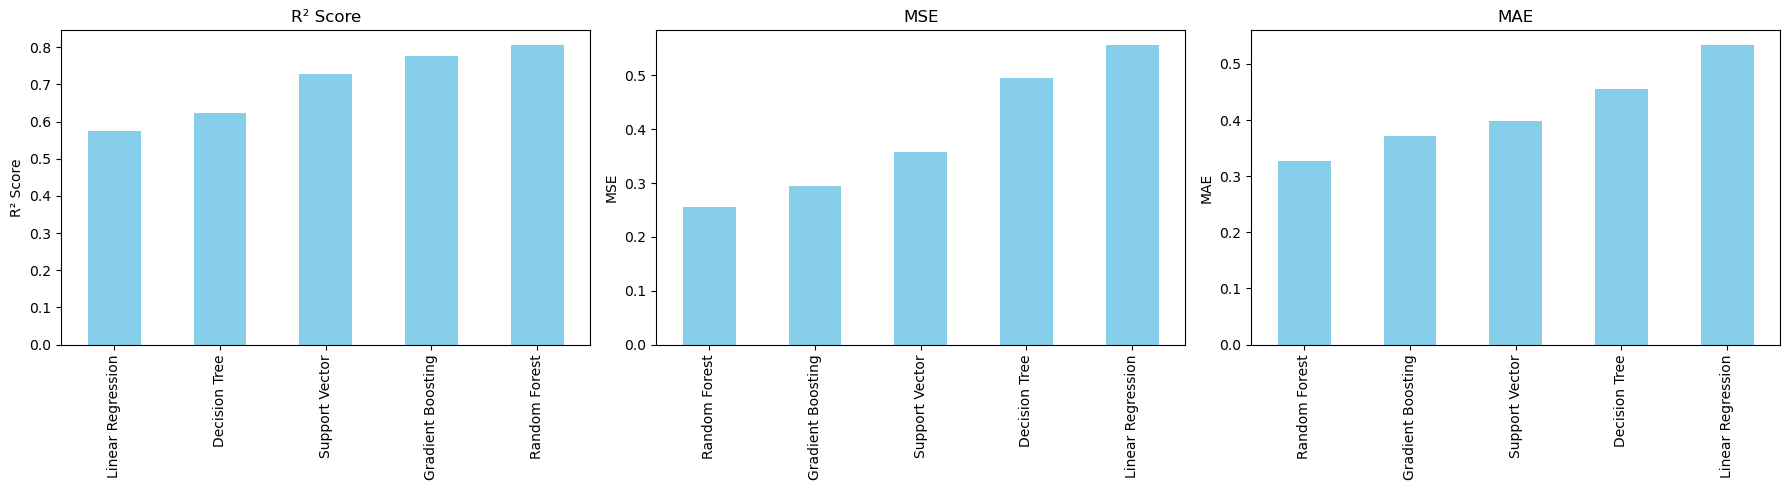

In [48]:
# Store results in a dictionary
results = {
    "Linear Regression": [r2_lr, mse_lr, mae_lr],
    "Decision Tree": [r2_dt, mse_dt, mae_dt],
    "Random Forest": [r2_rf, mse_rf, mae_rf],
    "Gradient Boosting": [r2_gb, mse_gb, mae_gb],
    "Support Vector": [r2_svr, mse_svr, mae_svr]
}

# Convert to DataFrame
results_df = pd.DataFrame(results, index=["R² Score", "MSE", "MAE"]).T
print("\nComparison of Model Performance:\n", results_df)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ["R² Score", "MSE", "MAE"]

for i, metric in enumerate(metrics):
    results_df[metric].sort_values().plot(kind='bar', ax=axes[i], title=metric, color='skyblue')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()


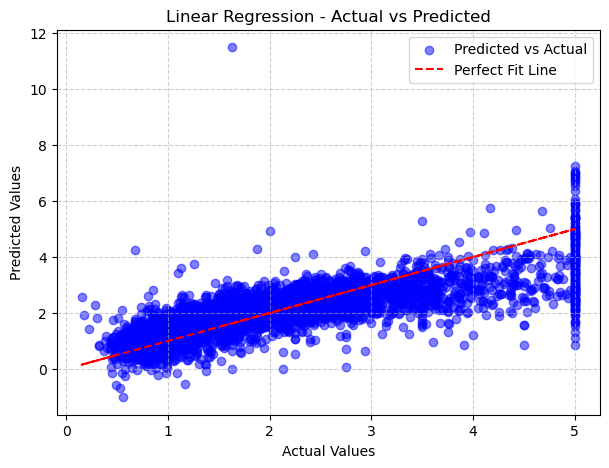

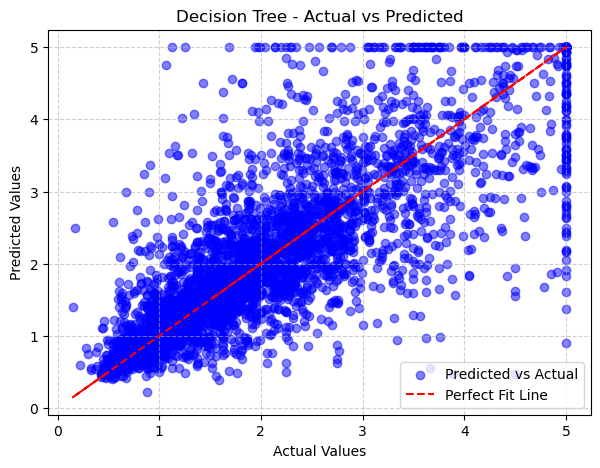

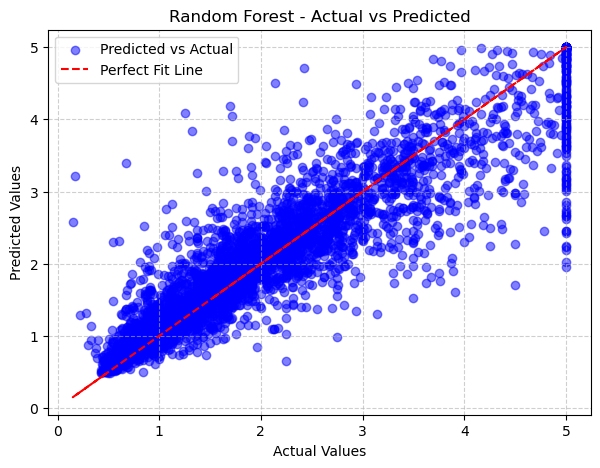

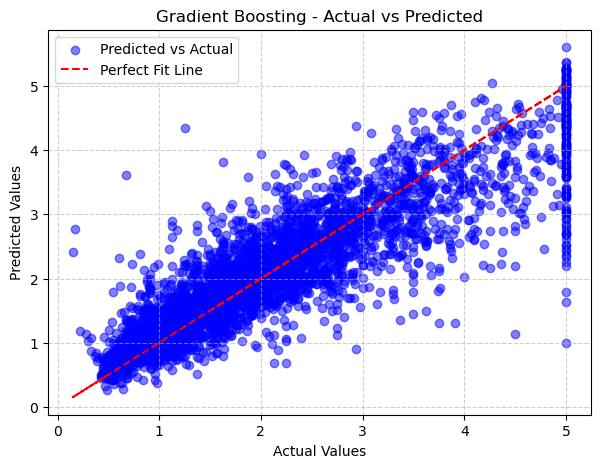

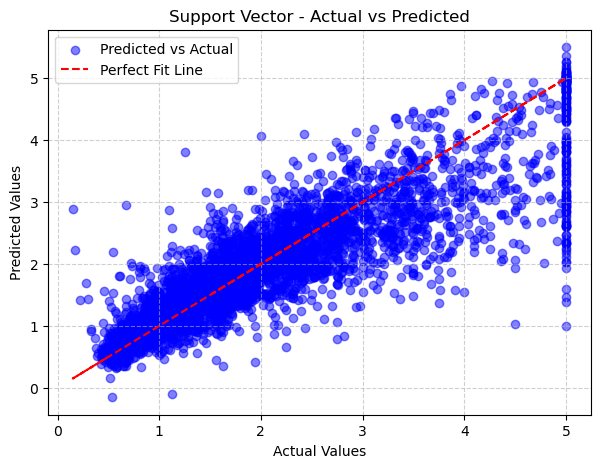

In [49]:
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector": y_pred_svr
}

# Scatter plot of actual vs. predicted values for each model
for model_name, y_pred in models.items():
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
    plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Perfect Fit Line")  # Ideal fit
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Linear Regression - no hyperparameters to tune, using the model as is
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}\n")


Linear Regression:
R² Score: 0.5758
MSE: 0.5559
MAE: 0.5332



In [ ]:
from sklearn.model_selection import GridSearchCV

# Reuse the original California housing dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')
dt_search.fit(X_train, y_train)

y_pred_dt_tuned = dt_search.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
rf_search.fit(X_train, y_train)

y_pred_rf_tuned = rf_search.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=3, scoring='r2')
gb_search.fit(X_train, y_train)

y_pred_gb_tuned = gb_search.predict(X_test)


In [ ]:
from sklearn.svm import SVR

svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}
svr_search = GridSearchCV(SVR(), svr_params, cv=3, scoring='r2')
svr_search.fit(X_train_scaled, y_train)

y_pred_svr_tuned = svr_search.predict(X_test_scaled)


In [59]:
def evaluate_model(y_true, y_pred):
    return [
        r2_score(y_true, y_pred),
        mean_squared_error(y_true, y_pred),
        mean_absolute_error(y_true, y_pred)
    ]

tuned_results = {
   
    "Tuned Decision Tree": evaluate_model(y_test, y_pred_dt_tuned),
    "Tuned Random Forest": evaluate_model(y_test, y_pred_rf_tuned),
    "Tuned Gradient Boosting": evaluate_model(y_test, y_pred_gb_tuned),
    "Tuned SVR": evaluate_model(y_test, y_pred_svr_tuned)
}

tuned_df = pd.DataFrame(tuned_results, index=["R² Score", "MSE", "MAE"]).T
print("\nTuned Model Performance:\n", tuned_df)



Tuned Model Performance:
                          R² Score       MSE       MAE
Tuned Decision Tree      0.697692  0.400019  0.428476
Tuned Random Forest      0.808942  0.252811  0.327571
Tuned Gradient Boosting  0.840736  0.210741  0.301188
Tuned SVR                0.757913  0.320334  0.376233
